In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
from google.colab import output
import os

In [ ]:
drive.mount("gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


In [ ]:
class Poster:
    # for initializing the object of class
    def __init__(self,background_image_path,dish_img_path,dish_name,target_path,img_size,logo_path= None,water_mark = False) :

        self.background_image_path = background_image_path
        self.logo_path = logo_path
        self.target_path = target_path
        self.img_size = img_size
        #self.logo_img = cv2.imread(self.logo_path) 
        #self.logo_img = cv2.resize(self.logo_img,self.img_size)
        self.background_img = cv2.imread(self.background_image_path)
        # self.background_img = cv2.resize(self.background_img,self.img_size)
        self.textedImg = None
        self.water_mark = water_mark
        self.dish_img = cv2.imread(dish_img_path)
        self.dish_name = dish_name
        cv2_imshow(self.background_img)
        
 


   # placing recipe on the template
    def place_recipe(self):
        recipe = "Recipe"
        textedImg = self.background_img
        k = 0
        n_steps = int(input("Enter no of Steps :"))
        for i in range(n_steps):
            step  = input("Enter step {} :".format(i+1))
            if len(step)<=44:
                pos = (25,240+k*20)
                k+=1
                font = cv2.FONT_ITALIC
                fontsize = 0.5
                color = (0,0,0)
                thickness = 1
                textedImg = cv2.putText(textedImg,"{}. ".format(i+1)+step,pos,font,fontsize,color,thickness)
            else:
                no_of_line = len(step)//44+1
                for line in range(no_of_line):
                    this_step= step[line*44:line*44+44]
                    pos = (25,240+k*20)
                    k+=1
                    font = cv2.FONT_ITALIC
                    fontsize = 0.5
                    color = (0,0,0)
                    thickness = 1
                    if line==0:
                        textedImg = cv2.putText(textedImg,"{}.".format(i+1)+this_step,pos,font,fontsize,color,thickness)
                    else:
                        textedImg = cv2.putText(textedImg,this_step,pos,font,fontsize,color,thickness)
            
        self.background_img = textedImg
        cv2_imshow(self.background_img) 


    
   

    # place dish image at top       
    def place_dish_img(self):

        # cmake copies of template and dish
        burger_copy = self.dish_img.copy()
        template_copy = self.background_img.copy()

        burger_copy =  cv2.resize(burger_copy,(100,100))
        x = 140
        y = 10
        roi = template_copy[y:y+100,x:x+100]

        template_copy[y:y+100,x:x+100] 

        img3 = burger_copy
        rows,cols,channel=img3.shape
        #gets the reigon of image of img1 with the size of img3
        cv2_imshow(roi)
        img3gray=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY) #converts color to gray
        ret,mask=cv2.threshold(src=img3gray,thresh=220,maxval=255,type=cv2.THRESH_BINARY_INV) #as the black and a color is near 0 so 
                                                                                  #if any value is less than 220 it become 0 else 255
                                                                                  #then the black and white gets inversed

        mask_inv=cv2.bitwise_not(mask) # gets the inverse of mask

        img1_bg=cv2.bitwise_and(roi,roi,mask=mask_inv) # put mask_inv on roi of img1
        img3_fg=cv2.bitwise_and(img3,img3,mask=mask)#creates colored area of original image with black/transparent background i think so

        dst=cv2.add(img1_bg,img3_fg) #add both image making only colored area visible
        img_new=template_copy
        img_new[y:y+100,x:x+100]=dst

        cv2.imwrite('food_template.jpg',img_new)
        self.background_img = template_copy
        cv2_imshow(template_copy)


    def place_header(self):
        y1 = 110
        x1 = 70

        header = self.background_img.copy()

        headed_roi = header[y1:y1+50,x1:x1+300]

        text = self.dish_name
        text_space = ''
        # provide equal spacing 
        if len(text) <= 14:
            font = cv2.FONT_HERSHEY_COMPLEX
            spaces = 14 - len(text)
            spaces = int(spaces/2)
            for i in range(spaces):
                text_space = text_space + " "
            text = text_space + text
        
        else:
            font = cv2.FONT_HERSHEY_COMPLEX_SMALL
            spaces = 20 - len(text)
            spaces = int(spaces/2)
            if spaces < 0:
                spaces = 0
            for i in range(spaces):
                text_space = text_space + " "
            text = text_space + text



        cv2.putText(img=headed_roi,text=text,org=(0,30),fontFace=font,fontScale=1,color=(255,255,0),thickness=1)

        header[y1:y1+50,x1:x1+300] = headed_roi
        self.background_img = header
        cv2_imshow(header)
  

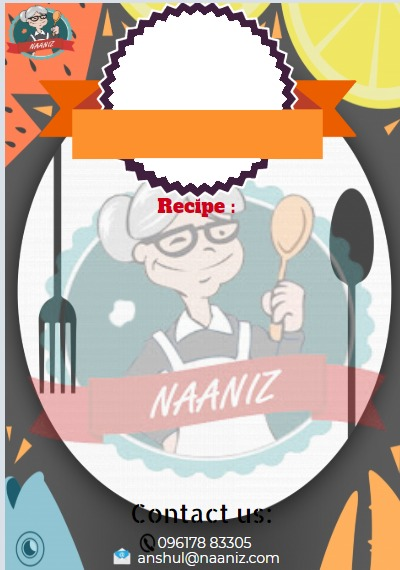

In [ ]:
               # template                   dish image           dish name                destination       size
poster = Poster('/content/template2.jpeg',"/content/burger1.jpg",'Burger',"gdrive/My Drive/",(600,800))

Enter no of Steps :5
Enter step 1 :firstly, steam 1/2 carrot, 6 gobi, 4 beans, 2 tbsp sweet corn, 2 tbsp peas and 1/4 tsp salt.
Enter step 2 :add 3 boiled and mashed potato.
Enter step 3 :add ¼ tsp cumin powder, 1/2 tsp garam masala, 1/4 tsp turmeric, 1/2 tsp chilli powder, 1/4 tsp chaat masala and 1/2 tsp salt.
Enter step 4 :prepare ball sized patties and dip in maida slurry.
Enter step 5 :shallow fry in hot oil keeping the flame on medium.


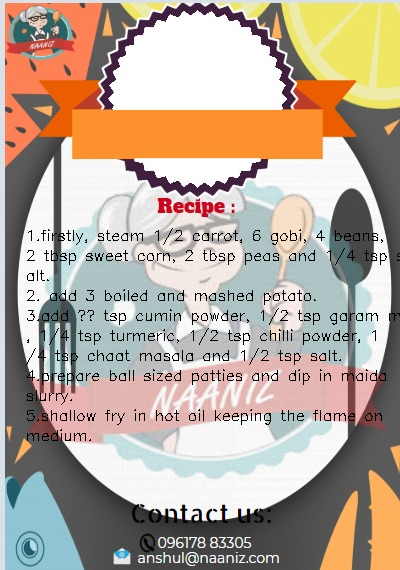

In [ ]:

poster.place_recipe()

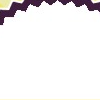

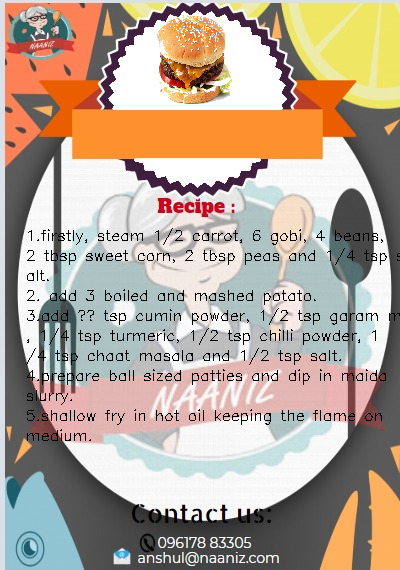

In [ ]:
poster.place_dish_img()

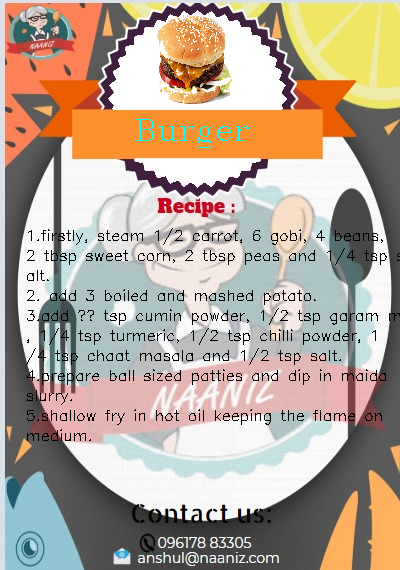

In [ ]:
poster.place_header()